In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

### Введение
Целью проекта является анализ доходной части бюджета Социального фонда России на основе открытых данных за 2023 - 2025 годы. В рамках проекта рассматривается динамика доходов, структура источников поступлений и полнота раскрытия детализированных статей бюджета.

### Описание данных

В анализе использованы открытые CSV-данные, опубликованные Социальным фондом России. Доходы за 2023 и 2024 годы представлены в агрегированном виде без разделения по годам. В связи с этим анализ структуры доходов выполнен для двух периодов: 2023 - 2024 и 2025 годы. Полноценный год-к-году анализ за 2023 и 2024 годы невозможен в рамках машиночитаемых данных.

В исходных данных отсутствует явное указание года, поэтому период был добавлен вручную.

Количество строк в файле данных об исполнении бюджета СФР по доходам за 2023 и 2024 года 34. 
Количество строк в файле данных об исполнении бюджета СФР по доходам за 2025 год 37. 

Кроме того, замечено, что некоторые суммы статей доходов с отрицательным знаком. Скорее всего, имеет место одно из двух обстоятельств:
1. Корректировки или возвраты (бюджет получил меньше, чем ожидалось или было возвращено)
2. Ошибки или перераспределения внутри периода.

In [164]:
income_23_24 = pd.read_csv('data/Ispolnenie_byudjeta_SFR_po_dohodam_.csv',encoding="utf-8",skiprows=1,header=0)
print('\nОсновная информация о данных за 2024 год:\n')
income_23_24.info()
print('\nНазвания столбцов в данных за 2024 год:\n')
print(income_23_24.columns)
income_25 = pd.read_csv('data/dohodiy.csv',encoding="utf-8",skiprows=1,header=0)
print('\nОсновная информация о данных за 2025 год:\n')
income_25.info()
print('\nНазвания столбцов в данных за 2025 год:\n')
print(income_25.columns)


Основная информация о данных за 2024 год:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Наименование публично раскрываемого показателя  34 non-null     object
 1   Значение показателяв в тыс. руб.                34 non-null     object
dtypes: object(2)
memory usage: 676.0+ bytes

Названия столбцов в данных за 2024 год:

Index(['Наименование публично раскрываемого показателя', 'Значение показателяв в тыс. руб.'], dtype='object')

Основная информация о данных за 2025 год:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Наименование публично раскрываемого показателя  36

In [165]:
income_25.head()

,Наименование публично раскрываемого показателя,Значение показателя
0,NaN,в тыс. руб.
1,"Доходы бюджета СФР, всего","16 830 722 534,7"
2,Страховые взносы на обязательное пенсионное с...,"9 324 209 593,4"
3,на выплату страховой пенсии,"9 324 197 033,0"
4,на выплату накопительной пенсии,"12 560,4"


### Особенности структуры исходных файлов. Объединение файлов. 

Есть небольшая разница в наименовании колонок: в данных за 2023 и 2024 колонка со значением суммы для показателя называется как "Значение показателяв в тыс. руб.", а для 2025 - "Значение показателя". Это произошло из-за того, что оставшаяся часть названия колонки для 2025 года переместилась в строку с индексом 0. 

Таким образом, всего строк в файле данных об исполнении бюджета СФР по доходам за 2025 год 36. 

В исходных файлах отсутствует колонка с указанем периода, поэтому год добавлен вручную на основании названия файла и периода публикации данных.
Произведено переименование колонок, в данных за 2025 год удалена строка с индексом 0.

Произведем вертикальное объединение файлов.

### Подготовка данных
- Добавлен столбец 'period' (период анализа)
- Переименованы столбцы для удобства: 'indicator', 'value_thousand_rub'
- Преобразованы значения в числовой формат
- Выделены агрегирующие строки ('всего','в т.ч.','из них')
- Отдельно выделены корректирующие/отрицательные статьи (возврат, корректировка).

In [166]:
income_23_24['period'] = "2023-2024"
income_25['period'] = "2025"
income_25 = income_25.drop([0])
rename_dict = {"Наименование публично раскрываемого показателя":"indicator",
               "Значение показателя":"value_thousand_rub",
               "Значение показателяв в тыс. руб.":"value_thousand_rub"
              }
for df in [income_23_24, income_25]:
    df.rename(columns=rename_dict,inplace="True")
    
income = pd.concat(
                    [income_23_24,income_25],
                    ignore_index=True
                  )
income

,indicator,value_thousand_rub,period
0,"Доходы бюджета СФР, всего","13 264 888 922,10",2023-2024
1,Страховые взносы на обязательное пенсионное с...,"7 742 914 492,40",2023-2024
2,на выплату страховой пенсии,"7 743 103 888,20",2023-2024
3,на выплату накопительной пенсии,"-189 395,80",2023-2024
4,Дополнительные страховые взносы на накопительн...,"666 950,70",2023-2024
...,...,...,...
65,на осуществление выплат ежемесячного пособия в...,"1 362 708 924,1",2025
66,на осуществление ежемесячной выплаты в связи с...,"71 527 851,0",2025
67,Средства Федерального фонда обязательного меди...,"166 944 140,4",2025
68,"Средства пенсионных накоплений, поступившие в ...","5 713 624,6",2025


#### Проверка после объединения

In [178]:
income.info()
income["period"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   indicator           70 non-null     object 
 1   value_thousand_rub  70 non-null     float64
 2   period              70 non-null     object 
 3   is_agregate         70 non-null     bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 1.8+ KB


period
2025         36
2023-2024    34
Name: count, dtype: int64

#### Преобразуем типы данных
- indicator - статья доходов (строка)
- value_thousand_rub - числовое значение
На данный момент value_thousand_rub имеет тип данных object.

In [192]:
income['value_thousand_rub'] = (
    income['value_thousand_rub']
    .str.replace(" ","",regex=False)
    .str.replace(",",".",regex=False)
    .astype(float)
)
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   indicator           70 non-null     object 
 1   value_thousand_rub  70 non-null     float64
 2   period              70 non-null     object 
 3   is_agregate         70 non-null     bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 1.8+ KB


#### Проверка пропусков.

In [180]:
income.isna().sum()

indicator             0
value_thousand_rub    0
period                0
is_agregate           0
dtype: int64

Пропуски отсутствуют.

### Анализ доходов

#### Топ-10 статей доходов
- Для каждого периода определены 10 крупнейших источников доходов.
- Визуализация: горизонтальные столбчатые диаграммы с подписью значений.
- Вывод: доходы сосредоточены в небольшом числе ключевых статей.

#### Общая динамика
- Построен график сравнения официального итога доходов и суммы детализированных статей с корректировками.
- Вывод: структура доходов стабильна.

In [181]:
# Количество строк в каждой группе
cnt_groups = income.groupby(['period','indicator']).size().sort_values(ascending=False)
display(cnt_groups)

period     indicator                                                                                                                                                                                
2023-2024       на выплату накопительной пенсии                                                                                                                                                         1
                на выплату страховой пенсии                                                                                                                                                             1
           Безвозмездные поступления в СФР от нерезидентов на выплату пенсий и иных социальных выплат, назначенных иностранными государствами лицам, проживающим на территории Российской Федерации     1
           Взносы организаций, использующих труд членов летных экипажей воздушных судов гражданской авиации, и взносы организаций угольной промышленности на выплату доплат к пенсии                 

В исходных даннх присутствуют агрегирующие строки (например, "всего", "в т.ч.", "из них"), которые дублируют значения детализированных показателей. Для корректного анализа структуры доходов такие строки были исключены, и анализ проводился на уровне детальных статей доходов.

In [182]:
income['is_agregate'] = income['indicator'].str.contains(r"\bвсего|в т\.ч\.|из них", case=False, regex=True)
income[income['is_agregate']].head(10)
income_clean = income[~income['is_agregate']].copy()

Сгруппируем записи по годам и статьям доходов. В качестве агрегирующей функции применим sum, т.к.:
- считаем общий объем доходов
- доходы являются аддитивным показателем
- анализируем "всего за период".

In [183]:
# Топ-10 статей для каждого периода
top10_by_year = (income_clean
                 .groupby(['period','indicator'])['value_thousand_rub']
                 .sum()
                 .reset_index()
                 .sort_values(['period','value_thousand_rub'],ascending=[True,False])
                 .groupby('period')
                 .head(10)
                )

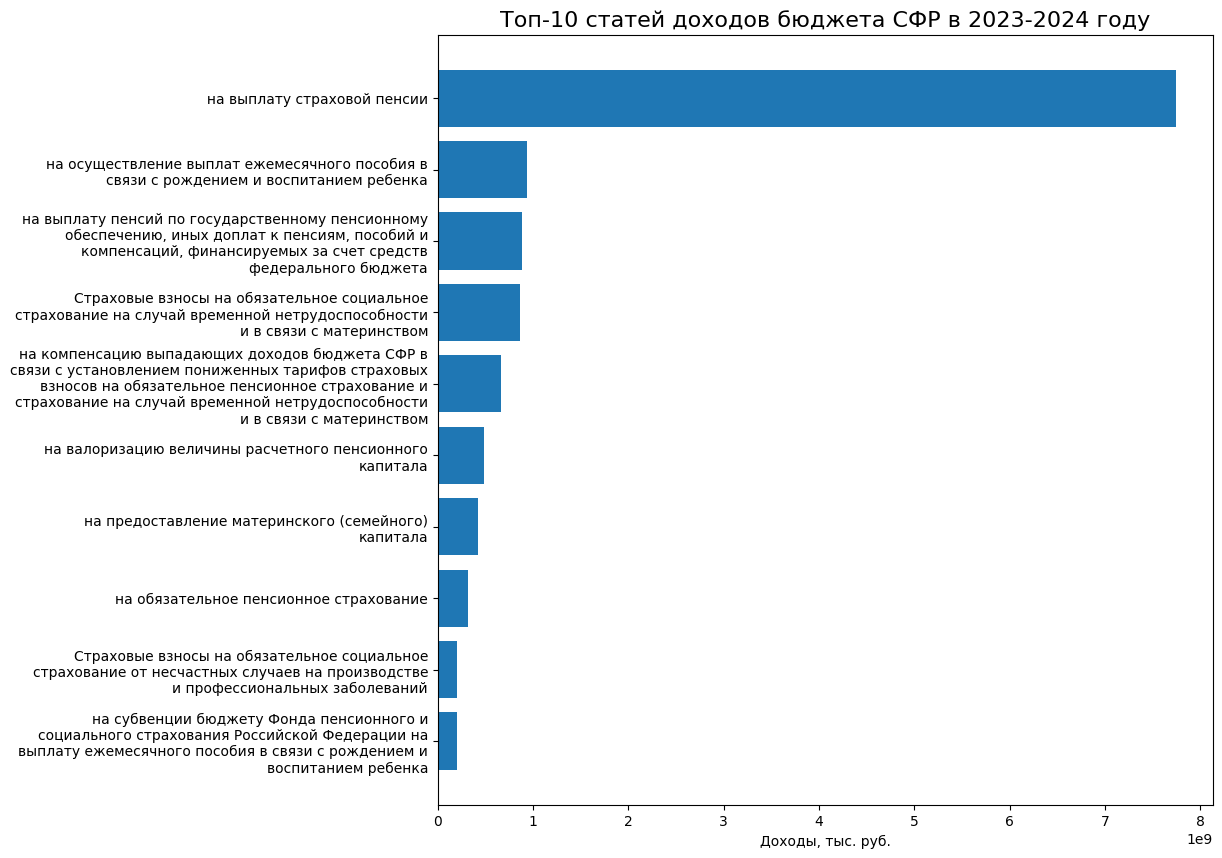

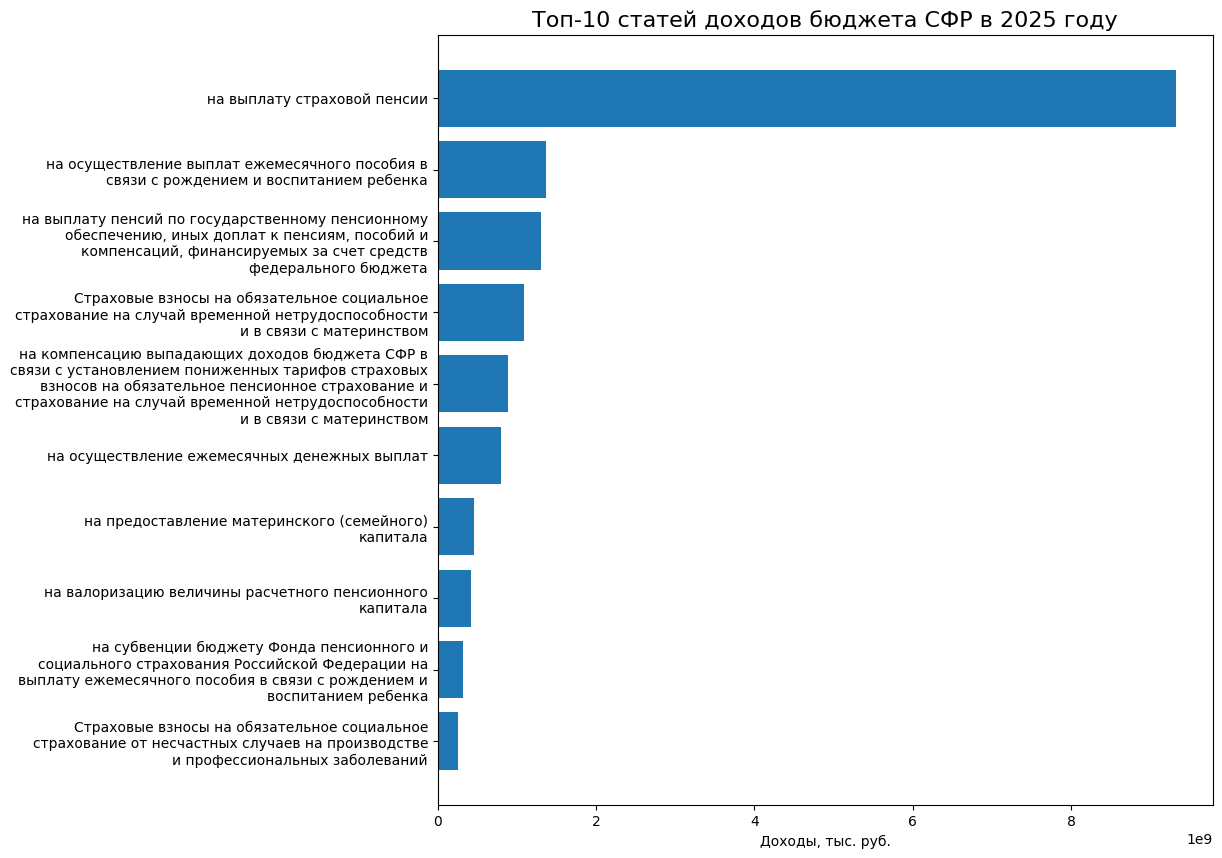

In [186]:
periods = sorted(top10_by_year['period'].unique())

for period in periods:
    data = top10_by_year[top10_by_year['period'] == period]
    labels = list(data['indicator'])
    # Функция для разбиения текста (например, максимум 50 символов в строке)
    wrapped_labels = [textwrap.fill(label, width=50) for label in labels]
    plt.figure(figsize=(10,10))
    plt.barh(wrapped_labels,data['value_thousand_rub'])
    plt.title(f'Топ-10 статей доходов бюджета СФР в {period} году', fontsize=16)
    plt.xlabel('Доходы, тыс. руб.')
    plt.ylabel("")
    plt.gca().invert_yaxis()
    plt.show();

Для каждого года отдельно были определены 10 крупнейших статей доходов бюджета СФР. Визуализация в виде горизонтальных столбчатых диаграмм позволяет наглядно сравнить структуру доходов внутри каждого года.

#### Динамика по годам топ-5 статей

/var/folders/xf/3x7lwcwx4m976jc66y3f40r40000gn/T/ipykernel_24524/3929682936.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_data['indicator_wrapped'] = top5_data['indicator'].apply(lambda x: textwrap.fill(x, width=50))


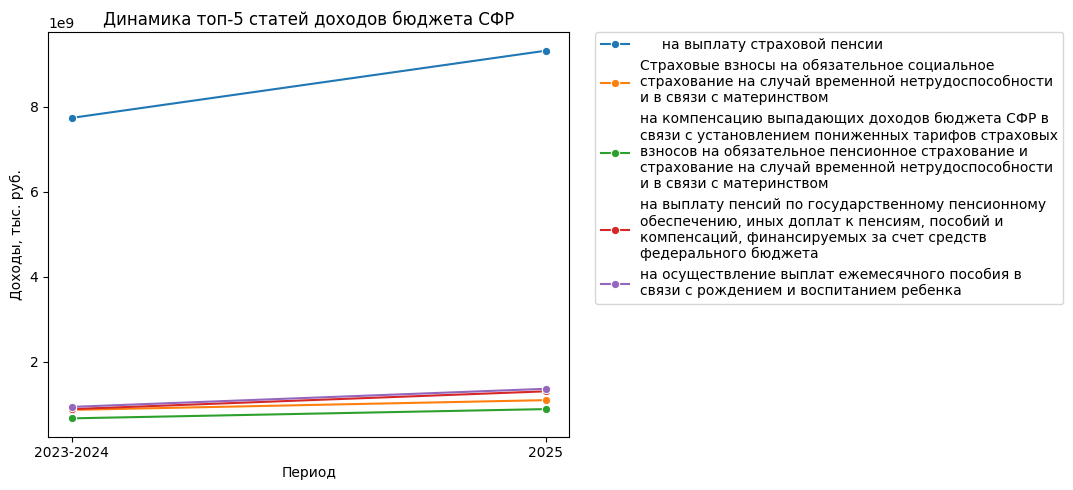

In [187]:
top5 = (
        income_clean
        .groupby('indicator')['value_thousand_rub']
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index
)

top5_data = income_clean[income_clean['indicator'].isin(top5)]
# Создаем сокращенные названия (например, перенос каждые 50 символов)
top5_data['indicator_wrapped'] = top5_data['indicator'].apply(lambda x: textwrap.fill(x, width=50))

plt.figure(figsize=(11,5))
sns.lineplot(
        data=top5_data,
        x='period',
        y='value_thousand_rub',
        hue='indicator_wrapped',
        marker='o'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Динамика топ-5 статей доходов бюджета СФР')
plt.xlabel('Период')
plt.ylabel('Доходы, тыс. руб.')
periods = ['2023-2024', '2025']
plt.xticks(periods)
plt.tight_layout()
plt.show();


### Проверка полноты детализации
- Сумма детализированных статей включает отрицательные значения.
- Разница с официальным итогом объясняется корректирующими статьями и агрегированными статьями, отсутствующими в детализированном наборе данных.

#### Сравнение "общих доходов" с суммой детальных статей для проверки полноты детализации данных.
Имеется 2 уровня данных:
1) Агрегирующие строки:
   - "Доходы бюджета, всего"
   - официальный итог
2) Детальные статьи:
   - конкретные источники доходов

1. Явно выделяем агрегирующие строки "всего".
   - Создаем фильтр только для общего итога, а не для всех агрегатов.
   - Видим, что для каждого года существует ровно одна агрегирующая строка.
   
2. Используем ранее созданный флаг is_agregate, чтобы получить детальные статьи.
3. Создаем флаг корректировок и возмещений
4. Считаем сумму статей по годам.
5. Объединяем и сравниваем.

In [196]:
# Явно выделяем агрегирующие строки "всего".
total_income = income[
    income['indicator'].str.contains(
        r'доходы.*всего',
        case=False,
        regex=True
    )
].copy()
total_income[['period','indicator','value_thousand_rub']]

,period,indicator,value_thousand_rub
0,2023-2024,"Доходы бюджета СФР, всего",1.326489e+10
34,2025,"Доходы бюджета СФР, всего",1.683072e+10


In [202]:
# Флаг корректирующих / возвратных статей
income['is_adjustment'] = income['indicator'].str.contains(
    r'возврат|корректировка',
    case=False,
    regex=True
)
# Используем ранее созданный флаг is_agregate, чтобы получить детальные статьи.
detailed_income = income[~income['is_agregate']].copy()
# Считаем сумму статей по годам.
detailed_sum = (
    detailed_income
    .groupby('period')['value_thousand_rub']
    .sum()
    .reset_index()
    .rename(columns={'value_thousand_rub':'detailed_sum'})                
)
detailed_sum

,period,detailed_sum
0,2023-2024,1.319386e+10
1,2025,1.680006e+10


In [203]:
# Сумма корректировок по периодам
adjustment_sum = (
    detailed_income[detailed_income['is_adjustment']]
    .groupby('period')['value_thousand_rub']
    .sum()
    .reset_index()
    .rename(columns={'value_thousand_rub':'adjustment_sum'})
)
adjustment_sum

,period,adjustment_sum
0,2023-2024,-55900866.0
1,2025,-3099722.5


In [206]:
# Объединяем и сравниваем.
comparison = total_income.merge(
    detailed_sum,
    on='period',
    how='left'
).merge(
    adjustment_sum,
    on='period',
    how='left'
)
# Заполняем NaN (если в периоде нет корректировок и возвратов) нулями
comparison['adjustment_sum'] = comparison['adjustment_sum'].fillna(0)

# Разница официального итога и суммы детализированных статей
comparison['difference'] = (
    comparison['value_thousand_rub'] - comparison['detailed_sum']
)
comparison = comparison[['period','value_thousand_rub','detailed_sum','adjustment_sum','difference']]
comparison.rename(columns={'value_thousand_rub':'official_total'},inplace=True)
comparison


,period,official_total,detailed_sum,adjustment_sum,difference
0,2023-2024,1.326489e+10,1.319386e+10,-55900866.0,7.103382e+07
1,2025,1.683072e+10,1.680006e+10,-3099722.5,3.066703e+07


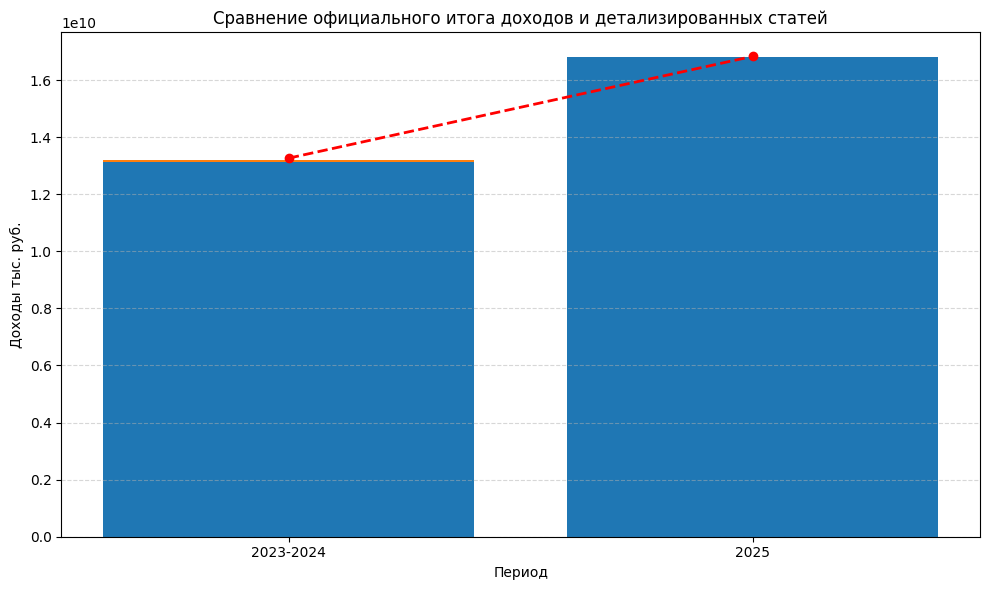

In [208]:
# Данные для графика
periods = comparison['period']
detailed = comparison['detailed_sum']
adjustments = comparison['adjustment_sum']
official = comparison['official_total']

plt.figure(figsize=(10,6))

# Детализированные статьи
plt.bar(periods,detailed,label='Сумма детализированных статей')

# Корректировки
plt.bar(periods,adjustments,bottom=detailed, label='Корректировки/возвраты')

# Официальный итог
plt.plot(periods,official,color='red', marker='o',linestyle='--',linewidth=2, label='Официальный итог')

plt.title('Сравнение официального итога доходов и детализированных статей')
plt.ylabel('Доходы тыс. руб.')
plt.xlabel('Период')
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()


#### График "Сравнение официального итога доходов и детализированных статей"

1. Столбцы показывают сумму детализированных статей по каждому периоду
2. Верхняя часть столбца - корректировки
3. Красная пунктирная линия - официальный итог для наглядного сравнения.

#### Результат проверки полноты детализации данных.
Сумма детализированных статей включает отрицательные значения (корректировки/возвраты). Разница с официальным итогом может быть как положительной, так и отрицательной, что отражает специфику бюджетных данных и корректировки в доходах.

### Выводы 
В открытых CSV-данных СФР доходы за 2023 и 2024 годы представлены в агрегированном виде без разделения по годам. В связи с этим анализ выполнен по периодам: 2023 - 2024 и 2025 годы. Это ограничивает возможность прямого сравнения доходов между 2023 и 2024 годами, однако позволяет проанализировать структуру доходов и сопоставить ее с более детализированными данными за 2025 год.

- Оснавная часть доходов сосредоточена в топ-10 статьях бюджета СФР.
- Отрицательные статьи показывают корректировки и возвраты, их учет важен для оценки полной картины доходов.
- Сумма детализированных статей близка к официальному итогу, расхождения логичны и объяснимы спецификой бюджетных данных.